Skewness before Box-Cox Transformation: -0.7698381425050179
Median before Box-Cox Transformation: 71.4
Mean before Box-Cox Transformation: 68.85607541899441


Skewness after Box-Cox Transformation: -0.18107221371423896
Lambda used for Box-Cox Transformation: 3.4893844550506423


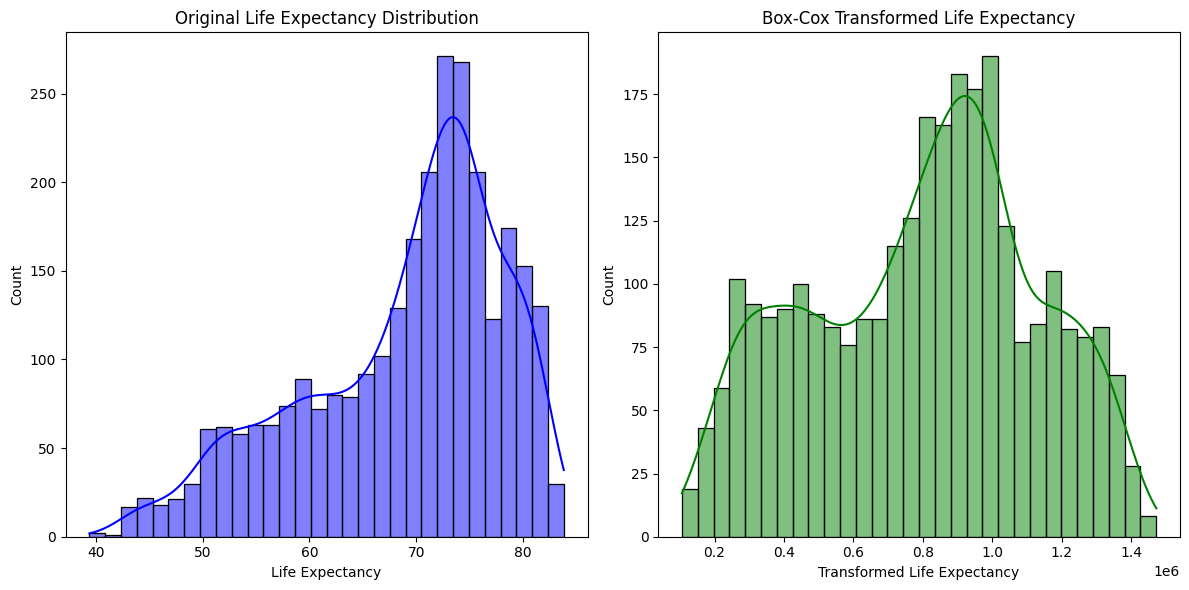

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, skew

df = pd.read_csv('../data/data.csv')

X = df.drop(['Life_expectancy', 'Region', 'Country', 'Year'], axis=1)
y = df['Life_expectancy']

# Apply Box-Cox transformation to the target
y_boxcox, lambda_val = boxcox(y) 

# Updated feature matrix (X) and transformed target (y_boxcox)
X_transformed = X
y_transformed = pd.Series(y_boxcox, name="Life_expectancy_BoxCox")

# Calculate skewness, median, and mean before and after transformation
skewness_original = skew(y)  
median_original = y.median() 
mean_original = y.mean() 

skewness_boxcox = skew(y_transformed)  

print("Skewness before Box-Cox Transformation:", skewness_original)
print("Median before Box-Cox Transformation:", median_original)
print("Mean before Box-Cox Transformation:", mean_original)
print("\n")
print("Skewness after Box-Cox Transformation:", skewness_boxcox)
print("Lambda used for Box-Cox Transformation:", lambda_val)

# Visualize the original and transformed target
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, color='blue', bins=30)
plt.title("Original Life Expectancy Distribution")
plt.xlabel("Life Expectancy")

plt.subplot(1, 2, 2)
sns.histplot(y_transformed, kde=True, color='green', bins=30)
plt.title("Box-Cox Transformed Life Expectancy")
plt.xlabel("Transformed Life Expectancy")

plt.tight_layout()
plt.show()
